In [52]:
import pandas
import json
import re
import numpy
from scipy.stats import norm
from matplotlib import pyplot
from scipy.stats import expon

data = pandas.read_csv('processed data/debates_cleaned1.csv')
words = set()
with open('lists/keywords.json', 'r') as file:
  words = set(json.load(file))
with open('lists/pacific_island_states.json', 'r') as file:
  islands = json.load(file)
with open('lists/eu.json', 'r') as file:
  eu = json.load(file)

In [53]:
def count_keywords(tokens):
  counter = 0
  re.sub(r'[^\x20-\x7E]', '', tokens)
  for token in tokens.split():
    counter += 1 if token in words else 0
  return counter

In [54]:
data['keywords'] = data['tokens'].apply(count_keywords)
data = data.sort_values(by = 'keywords', ascending = False)
data = data.drop('session', axis = 1)
data.head(10)

,year,country,text,tokens,keywords
4308,2013,DMA,I would like to begin \r\nby congratulating yo...,would like begin congratul presid ash sister i...,47
4266,2013,TUV,It is a great honour and \r\npleasure to parti...,great honour pleasur particip sixty-eighth ses...,43
3753,2010,TJK,I would like to \r\ncongratulate Mr. Joseph De...,would like congratul mr. joseph deiss elect pr...,42
4275,2013,FSM,I am pleased to join previous \r\nspeakers in ...,pleas join previou speaker congratul presid el...,42
3659,2010,GUY,I bring to all delegates at this \r\nsixty-fif...,bring deleg sixty-fifth session gener assembl ...,41
4117,2012,DMA,﻿On behalf of the\nGovernment and people of th...,﻿on behalf govern peopl commonwealth dominica ...,41
4326,2013,BRB,It is my distinct honour \nand pleasure to con...,distinct honour pleasur congratul mr. presid a...,38
4319,2013,TTO,"This \nevening, as the Chairperson of the Con...",thi even chairperson confer head state govern ...,37
4251,2013,NRU,May I first congratulate Mr. John \nAshe on hi...,may first congratul mr. john ash elect presid ...,36
4174,2012,GRD,﻿I am honoured to address\nthe General Assembl...,honour address gener assembl sixty-seventh ses...,35


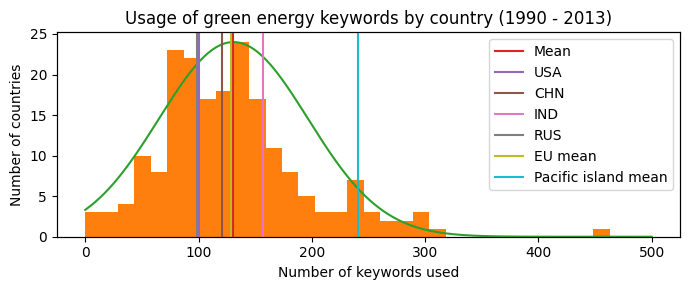

In [55]:
grouped = data.groupby(by='country')['keywords'].sum()
avg = grouped.mean()
std = abs(grouped.std())
x = numpy.linspace(0, 500, 500)

_, ax1 = pyplot.subplots(figsize = (7, 3))
ax1.hist(grouped, bins = 32, color = 'C1')

ax2 = ax1.twinx()
ax2.plot(x, norm.pdf(x, avg, std), color = 'C2')
ax2.tick_params(axis = 'y', length=  0)
ax2.set_yticklabels([])
ax2.set_ylim(bottom = 0)

pyplot.axvline(avg, color = 'C3', label = 'Mean')
pyplot.axvline(grouped.loc['USA'], color = 'C4', label = 'USA')
pyplot.axvline(grouped.loc['CHN'], color = 'C5', label = 'CHN')
pyplot.axvline(grouped.loc['IND'], color = 'C6', label = 'IND')
pyplot.axvline(grouped.loc['RUS'], color = 'C7', label = 'RUS')
pyplot.axvline(grouped.loc[eu].mean(), color = 'C8', label = 'EU mean')
pyplot.axvline(grouped.loc[islands].mean(), color = 'C9', label = 'Pacific island mean')

pyplot.title('Usage of green energy keywords by country (1990 - 2013)')
ax1.set_ylabel('Number of countries')
ax1.set_xlabel('Number of keywords used')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right')

pyplot.tight_layout()
pyplot.savefig('figs/hist.png')
pyplot.show()

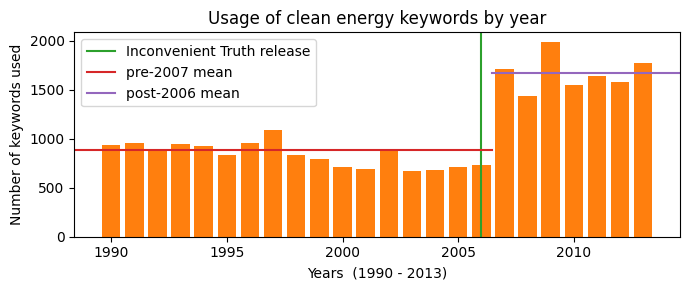

In [56]:
years = data.groupby(by = 'year')['keywords'].sum()

pyplot.figure(figsize = (7, 3))
pyplot.bar(years.index, years, color = 'C1')

pyplot.axvline(2006, color = 'C2', label = 'Inconvenient Truth release')

pyplot.axhline(years.loc[:2007].values.mean(), color = 'C3', label = 'pre-2007 mean', xmax = .69)
pyplot.axhline(years.loc[2007:].values.mean(), color = 'C4', label = 'post-2006 mean', xmin = .69)

pyplot.title('Usage of clean energy keywords by year')
pyplot.ylabel('Number of keywords used')
pyplot.xlabel('Years  (1990 - 2013)')
pyplot.legend()

pyplot.tight_layout()
pyplot.savefig('figs/bar.png')
pyplot.show()

In [57]:
def green_sum(row):
  return row['Electricity - total hydro production'] + row['Electricity - total nuclear production'] + row['Electricity - total solar production'] + row['Electricity - total wind production']

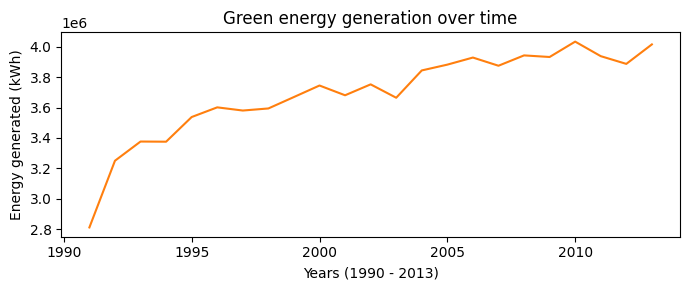

In [58]:
stats = pandas.read_csv('processed data/merged.csv').fillna(0)
stats['green energy'] = stats.apply(green_sum, axis = 1)
stats = stats.groupby('year')['green energy'].sum()

pyplot.figure(figsize = (7, 3))
pyplot.plot(stats.index, stats, color = 'C1')

pyplot.title('Green energy generation over time')
pyplot.ylabel('Energy generated (kWh)')
pyplot.xlabel('Years (1990 - 2013)')

pyplot.tight_layout()
pyplot.savefig('figs/energy.png')
pyplot.show()